<a href="https://colab.research.google.com/github/ABZ-Aaron/PartyAffiliation/blob/master/PartyAffiliation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Party Affiliation in the United States
#### By Aaron Wright - 1912626
---

The purpose of this analysis is two implement 2 distinct AI algorithms on a selected dataset. Throughout this report I will apply classification techniques to help assess voting habits, and predict whether an indvidiual votes **Democrat** or **Republican**.

## Dataset

Information on our dataset.

This dataset was taken from the UCI Machine Learning Repository ([source]('https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records'))

### Title

1984 United States Congressional Voting Records

### Description


This dataset contains individual votes from each US Congressman on 16 different key votes identified by the CQA.

There are 9 different kinds of votes:

* 3 are "voted for", "paired for", "annouced for". These are simplified to "y" in the dataset. 

* 3 are "voted against", "paired against", and "announced against". These are simplified to "n" in the dataset.

* 3 are "voted present", "voted present to avoid conflict of interest", "did not vote or make position known". These are simplified to "?" in the dataset.

### Attributes

1. party
1. handicapped-infants
1. water-project-cost-sharing
1. adoption-of-the-budget-resolution
1. physician-fee-freeze
1. el-salvador-aid
1. religious-groups-in-schools
1. anti-satellite-test-ban
1. aid-to-nicaraguan-contras
1. mx-missile
1. immigration
1. synfuels-corporation-cutback
1. education-spending
1. superfund-right-to-sue
1. crime
1. duty-free-exports
1. export-administration-act-south-africa

## Imports

Packages we need.

In [1]:
import graphviz as gvz

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import plotly.express as px

import seaborn as sns

from sklearn import tree

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

## Data Loading

Loading our data in and setting column names.

In [2]:
# Take data from Github repository 
data = 'https://raw.githubusercontent.com/ABZ-Aaron/PartyAffiliation/master/votes_data.csv?token=AND25LFLHJXHZZMCYHIFOMTBVQHBE'

In [3]:
# Column names
cols = ["party", 
        "hc-infants", 
        "water-proj", 
        "budget-reso", 
        "fee-freeze", 
        "salvador-aid", 
        "relig-groups", 
        "anti-satell", 
        "nicar-contras",
        "mx-missile",
        "immigration",
        "syn-cutback",
        "edu-spending",
        "right-to-sue",
        "crime",
        "dutyfree-expo",
        "admin-act-sou"]

In [4]:
# Read in our data
votes = pd.read_csv(data, names = cols)

## Data Exploration

Exploring our data, and understanding it better.

In [5]:
# Check top 3 records
votes.head(3)

,party,hc-infants,water-proj,budget-reso,fee-freeze,salvador-aid,relig-groups,anti-satell,nicar-contras,mx-missile,immigration,syn-cutback,edu-spending,right-to-sue,crime,dutyfree-expo,admin-act-sou
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n


In [6]:
# Check bottom 3 records
votes.tail(3)

,party,hc-infants,water-proj,budget-reso,fee-freeze,salvador-aid,relig-groups,anti-satell,nicar-contras,mx-missile,immigration,syn-cutback,edu-spending,right-to-sue,crime,dutyfree-expo,admin-act-sou
432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y
434,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,?,n


In [7]:
# Show information associated with dataframe
votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   party          435 non-null    object
 1   hc-infants     435 non-null    object
 2   water-proj     435 non-null    object
 3   budget-reso    435 non-null    object
 4   fee-freeze     435 non-null    object
 5   salvador-aid   435 non-null    object
 6   relig-groups   435 non-null    object
 7   anti-satell    435 non-null    object
 8   nicar-contras  435 non-null    object
 9   mx-missile     435 non-null    object
 10  immigration    435 non-null    object
 11  syn-cutback    435 non-null    object
 12  edu-spending   435 non-null    object
 13  right-to-sue   435 non-null    object
 14  crime          435 non-null    object
 15  dutyfree-expo  435 non-null    object
 16  admin-act-sou  435 non-null    object
dtypes: object(17)
memory usage: 57.9+ KB


In [8]:
# Return number of unique values by column
votes.nunique()

party            2
hc-infants       3
water-proj       3
budget-reso      3
fee-freeze       3
salvador-aid     3
relig-groups     3
anti-satell      3
nicar-contras    3
mx-missile       3
immigration      3
syn-cutback      3
edu-spending     3
right-to-sue     3
crime            3
dutyfree-expo    3
admin-act-sou    3
dtype: int64

In [9]:
# Return unique values for target variable
votes['party'].unique()

array(['republican', 'democrat'], dtype=object)

In [10]:
# Return unique values from one feature variable
votes['hc-infants'].unique()

array(['n', '?', 'y'], dtype=object)

In [11]:
votes['party'].value_counts(dropna=False)

democrat      267
republican    168
Name: party, dtype: int64

In [12]:
votes['party'].value_counts(normalize=True)

democrat      0.613793
republican    0.386207
Name: party, dtype: float64

In [13]:
fig = px.pie(votes, "party", title = "Rep vs Dem Count")
fig.show()

Some details of our datset

* **17** columns 
* **1** target variable
* **16** features
* **435** records
* No **NULL** values
* All of **object** datatype
* Target variable consists of two entries: **republican** and **democrat**
* Feature variables consist of three entries: **y**, **n** and **?**
* The **?** represents values that are neither yes or no.
* More Democrats (**61%**) than Republicans (**39%**) in the dataset.

## Data Cleaning

Cleaning up our data, preparing it for our machine learning algorithms.

Let's first convert our feature variables to a numerical type. We'll need this if we run a k-nearest neighbours (KNN) algorithm.

In [14]:
# Replace the **y** and **n** with numerical values
votes.replace({"y" : 1 ,"n" : 0}, inplace = True)

There are a few ways we could deal with our **?** values:

1. Remove rows with ? values
1. Remove columns with ? values
1. Replace ? values with something

We don't want to remove columns as this would remove almost all the features. Replacing could be an option. However, the simplest option would be to remove records containing ?. 

Let's see how many records we have remaining after removing records containing ?.

In [15]:
# Remvoing NA rows
votes.replace('?', np.NaN).dropna()['party'].value_counts()

democrat      124
republican    108
Name: party, dtype: int64

It can be seen that we have significantly fewer records using this approach. Another approach is to replace the ? values with something.

One option here is to replace them with nothing. This could cause issues for algorithms like KNN (algorithms that implement distance functions). 

Another option is to replace them with something like the `mode` (most common value of each row). This is what I've done.

Note, this perhaps isn't the best way of doing it. We can't really infer the `?`votes based on what was answered for other votes, as there is likely no relationship there (from my understanding). Perahps the best solution would be to use something like KNN to to predict what the missing values should be. More on that [here](https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/). If I find time, I may give this a go.

For now, I'll stick with the mode.

In [16]:
votes.replace("?", np.nan, inplace = True)
votes = votes.T.fillna(votes.iloc[:,1:].astype(float).mode(axis=1)[0]).T

From doing a bit more searching, we can see that one row had a lot of `?` and thus still retains many `NAN` values. We'll just remove this:

In [17]:
votes.iloc[248]

party            republican
hc-infants              NaN
water-proj              NaN
budget-reso             NaN
fee-freeze              NaN
salvador-aid            NaN
relig-groups            NaN
anti-satell             NaN
nicar-contras           NaN
mx-missile              NaN
immigration             NaN
syn-cutback             NaN
edu-spending            NaN
right-to-sue            NaN
crime                   NaN
dutyfree-expo           NaN
admin-act-sou           NaN
Name: 248, dtype: object

In [18]:
votes = votes.drop(votes.index[248])

Let's confirm we only have 2 unique values for each column and that there are no `nan` values.

In [19]:
votes.nunique()

party            2
hc-infants       2
water-proj       2
budget-reso      2
fee-freeze       2
salvador-aid     2
relig-groups     2
anti-satell      2
nicar-contras    2
mx-missile       2
immigration      2
syn-cutback      2
edu-spending     2
right-to-sue     2
crime            2
dutyfree-expo    2
admin-act-sou    2
dtype: int64

In [20]:
for col in votes:
    print(votes[col].unique())

['republican' 'democrat']
[0.0 1.0]
[1.0 0.0]
[0.0 1.0]
[1.0 0.0]
[1.0 0.0]
[1.0 0.0]
[0.0 1.0]
[0.0 1.0]
[0.0 1.0]
[1.0 0.0]
[1.0 0.0]
[1.0 0.0]
[1.0 0.0]
[1.0 0.0]
[0.0 1.0]
[1.0 0.0]


Let's also convert all but the first column to a numeric datatype:

In [21]:
cols = [i for i in votes.columns if i != 'party']
for col in cols:
    votes[col] = votes[col].astype(int)

In [22]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434 entries, 0 to 434
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   party          434 non-null    object
 1   hc-infants     434 non-null    int64 
 2   water-proj     434 non-null    int64 
 3   budget-reso    434 non-null    int64 
 4   fee-freeze     434 non-null    int64 
 5   salvador-aid   434 non-null    int64 
 6   relig-groups   434 non-null    int64 
 7   anti-satell    434 non-null    int64 
 8   nicar-contras  434 non-null    int64 
 9   mx-missile     434 non-null    int64 
 10  immigration    434 non-null    int64 
 11  syn-cutback    434 non-null    int64 
 12  edu-spending   434 non-null    int64 
 13  right-to-sue   434 non-null    int64 
 14  crime          434 non-null    int64 
 15  dutyfree-expo  434 non-null    int64 
 16  admin-act-sou  434 non-null    int64 
dtypes: int64(16), object(1)
memory usage: 61.0+ KB


Now let's visualise our data using `countplot`. This will give us an idea of the way republicans and democrats are voting on each issue.

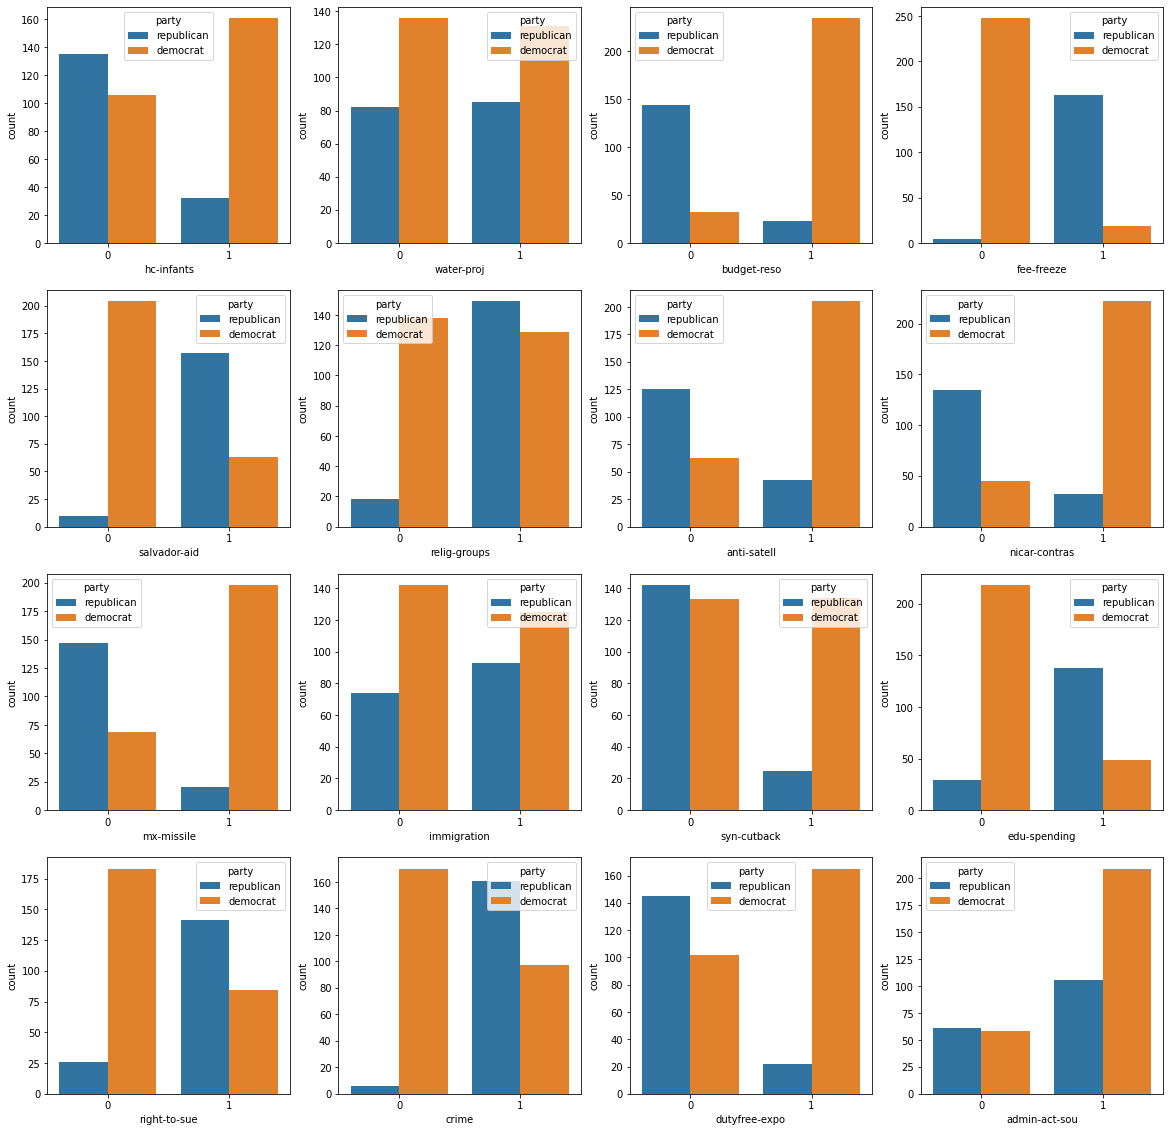

In [23]:
fig, ax = plt.subplots(4,4, figsize=(20, 20))
count = 1
for i in range(4):
  for j in range(4):
    sns.countplot(x = votes.columns[count], hue = 'party', data = votes, ax = ax[i, j])
    count += 1
fig.show()


Let's now convert our target variable `party` to 0's and 1's:

In [24]:
votes['party'] = np.where(votes['party'] == 'democrat', 1, 0)

In [25]:
votes.head()

,party,hc-infants,water-proj,budget-reso,fee-freeze,salvador-aid,relig-groups,anti-satell,nicar-contras,mx-missile,immigration,syn-cutback,edu-spending,right-to-sue,crime,dutyfree-expo,admin-act-sou
0,0,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1
1,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,1,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,1,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,1,1


## AI Algorithms

Here we'll run our data through a couple of algorithms, speicially machine learning algorithms: Decision Tree & KNN. 

### Decision Tree

Let's start with a decision tree, sometimes knows as CART (classification and regression trees).

I'll use something called Information Gain, which will be used to select the attributes at each level of our tree. The attribute at the top of our Decision Tree (or root node) should be the attribute holding the most "information".

Another way of putting it is that attributes with less information, have less entropy. 

We can also select attributes at each level using something called the Gini Index, or Gini Impurity. This is similar to Informtion Gain.

In [102]:
# Our Feature Variables
X = votes.drop(['party'], axis = 1)

# Our Target Variable
Y = votes['party']

We'll want to test our model on completely unseen data once we've put it together. For that, we can split our current data into a training and testing set. I'll add a random state to control the shuffling applied to data before we split. I'll also add the stratify parameter.

In [103]:
# Split our data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .33, stratify = Y, random_state = 10)

In [104]:
# Create decision tree object
decision_tree_classifier = DecisionTreeClassifier()

We'll also run an exhaustive search over specified parameters. This will evaulate our model for every combination of parameters - and saves us a bit of work when it comes to tuning our model, hopefully.

We'll have it try both `gini` and `information gain` to select attributes at each level of our tree.

We'll pass it a number of `max depth` numbers. This controls how big our tree can grow. Too high, we'll overfit our training data - which means it won't perform well on our unseen test data. Too low, we'll underfit and not capture relevant patterns.

By default, 5-fold cross validation will be applied, which I'll just leave.

I'll also set scoring to `accuracy`. This is a failry basic metric, and is basically the number of correct predictions over the toal number of predictions made. It'll be okay for our purposes.

In [105]:
# Our parameters
parameters = {'criterion' : ['gini', 'entropy'],
              'max_depth' : [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]
              }

In [106]:
# Grid Search 
dt = GridSearchCV(decision_tree_classifier, parameters, scoring = 'accuracy')

In [107]:
# Fit out model 
dt.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]},
             scoring='accuracy')

In [108]:
# Our best accuracy score from the above
dt.best_score_

0.9655172413793103

In [109]:
# Parameters used to generate our score
dt.best_params_

{'criterion': 'entropy', 'max_depth': 3}

Let's now test our model on the unnseen test data

In [34]:
y_prediction = dt.predict(x_test)
accuracy_score(y_test, y_prediction)

0.9444444444444444

We can also calculate the accuracy for the training set. I believe this is different from `dt.best_score_` as the latter calculates the score based on a particular fold in the data (during cross validation).

In [110]:
y_prediction_train = dt.predict(x_train)
accuracy_score(y_train, y_prediction_train)

0.9724137931034482

Looks like we have a really good model here, where both the test and training data have high accuracy scores.

Let's now visualise our tree with `graphviz`

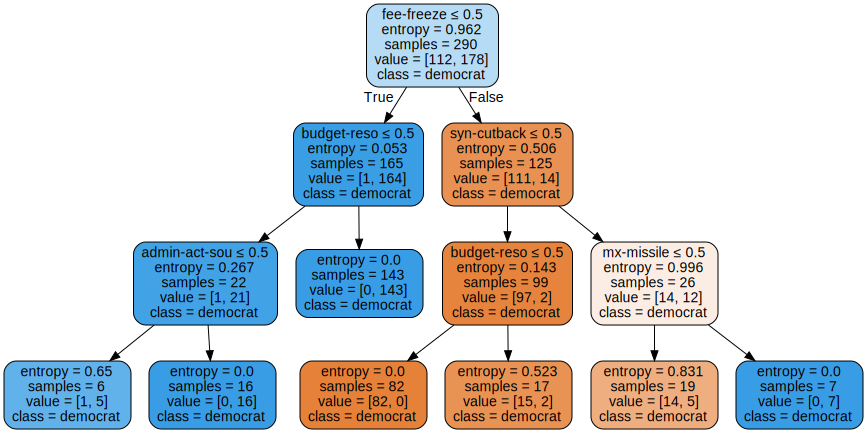

In [35]:

y_train_string = np.where(y_train == 1, 'democrat', 'republican')
data = tree.export_graphviz(dt.best_estimator_, 
                            out_file=None, 
                            feature_names=x_train.columns, 
                            class_names=y_train_string, 
                            filled=True, 
                            rounded=True, 
                            special_characters=True)

graph = gvz.Source(data) 

graph 

Let's nowthrow together a confusion matrix. This will help to interpret our results by showing us `true positives`, `false negatives`, `true negatives`, and `false positives`.

In [36]:
# Confusion Matrix
confusion_matrix(y_test, y_prediction)

array([[51,  4],
       [ 4, 85]])

In [37]:
# Slightly better confustion matrix
y_test_ = pd.Series(y_test.tolist(), name='Actual')
y_prediction_ = pd.Series(y_prediction.tolist(), name='Predicted')
pd.crosstab(y_test_, y_prediction_)

Predicted,0,1
Actual,,
0,51,4
1,4,85


Generally, we can see good performance here. Very few mistakes were made as we can see from the confusion matrix, and we have a good accuracy score.

### K-Nearest Neighbours (KNN)

Let's now look at KNN. In simple terms, this just calculates the distance between a sample data point and other training data points.

Different distance measurement types can be used. We also need to specify k (usualy best to use an odd number). This represents the k-nearest data points for the sample data point. By doing this, the sample data point is assigned to the class where the majority of those k points belong. 

When selecting k, we want to select the optimal value that won't result in our model overfitting or underfitting.

We can do this similar to how we did the decision tree. Test a lot of values of k to determine the best one.

Although I already split the data up, defined the target variable etc, I'll run the code again below for consistency, to make it clearer what's going on.


In [111]:
# for consistency
X = votes.drop(['party'], axis = 1)

# Our Target Variable
Y = votes['party']

In [112]:
# Split our data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .33, stratify = Y, random_state = 10)

Now we'll work out the ideal K. We can do this using GridSearchCV like we did for the DT. There's is another way, using the `elbow method` but couldn't find a simple way of implementing this.

In [113]:
# Create knn object
knn = KNeighborsClassifier()

In [114]:
# Our parameter. We'll try 60 k values
parameters = {'n_neighbors' : range(1,60)}

In [115]:
# Grid Search 
knn_grid = GridSearchCV(knn, parameters, scoring = 'accuracy')

In [116]:
# Fit model to our training data
knn_grid.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 60)}, scoring='accuracy')

In [117]:
# What is our ideal K?
knn_grid.best_params_

{'n_neighbors': 5}

In [118]:
# Predict our test and training set results
y_prediction_test = knn_grid.predict(x_test)
y_prediction_train = knn_grid.predict(x_train)

In [120]:
# Compute accuracy scores
accuracy_test = accuracy_score(y_test, y_prediction_test)
accuracy_train = accuracy_score(y_train, y_prediction_train)

print(f"Test Accuracy: {accuracy_test}")
print(f"Train Accuracy: {accuracy_train}")
print(f"Score from .best_score_ : {knn_grid.best_score_}")

Test Accuracy: 0.9513888888888888
Train Accuracy: 0.9551724137931035
Score from .best_score_ : 0.9310344827586207


In [127]:
# Confustion matrix
y_test_ = pd.Series(y_test.tolist(), name='Actual')
y_prediction_ = pd.Series(y_prediction_test.tolist(), name='Predicted')
cm = pd.crosstab(y_test_, y_prediction_)
cm

Predicted,0,1
Actual,,
0,53,2
1,5,84


In [132]:
print(f"True Positive: {cm[0][0]}")
print(f"True Negative: {cm[1][1]}")
print(f"False Positive: {cm[0][1]}")
print(f"False Negative: {cm[1][0]}")

True Positive: 53
True Negative: 84
False Positive: 5
False Negative: 2


We can see that our model, with a k value of 5, has performed well. We have high accuracy scores, as well as very few errors based on the confusion matrix.

Should be noted I just stuck with the accuracy evaluation metric for both the decision tree and KNN. 

The formula for this is:

``` 
true positive + true negative / true positive + true negative + false positive + false negative
```

We could also have used recall:

```
true positive / true positive + false negative
```

or Precision:

```
true positive / true positive + false positive
```

Depending on the task, some may be better suited than others. Accuracy is the simplest, so I just stuck with that. But the other metrics may have been useful too. 